In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt


train_data_path = '/home/pluto2477/Documents/ML_final_report/data/train_log_processed_final.csv'
test_data_path = '/home/pluto2477/Documents/ML_final_report/data/test_log_processed_final.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

train_df.head()

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,...,Occupation_Self-Employed,Occupation_Unemployed,Occupation_Unknown,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Property Type_Condo,Property Type_House
0,19.0,9.215328,1.0,1,22.598761,1.098612,17.0,372.00000,5.0,0,...,True,False,False,False,True,False,True,False,False,True
1,39.0,10.363409,3.0,2,15.569731,0.693147,12.0,694.00000,2.0,1,...,False,False,True,False,False,True,False,True,False,True
2,23.0,10.150465,3.0,0,47.177549,0.693147,14.0,592.92435,3.0,2,...,True,False,False,True,False,False,True,True,False,True
3,21.0,11.862568,2.0,1,10.938144,0.693147,0.0,367.00000,1.0,0,...,False,False,True,False,False,False,False,True,False,False
4,21.0,10.587897,1.0,1,20.376094,0.000000,8.0,598.00000,4.0,0,...,True,False,False,False,False,False,True,True,False,True


In [10]:
# 훈련데이터에서 검증데이터셋 분리
from sklearn.model_selection import train_test_split

X = train_df.drop('Premium Amount', axis=1)
y = train_df['Premium Amount']

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((960000, 30), (240000, 30), (960000,), (240000,))

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train을 기준으로 학습하고 변환
X_train_scaled = scaler.fit_transform(X_train)
# X_val은 변환만 (절대 fit 금지!)
X_val_scaled = scaler.transform(X_val)

# 모델 재학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# 예측 및 평가
y_pred = model.predict(X_val_scaled)

In [12]:
# y와 각 X 변수들 간의 상관계수 출력
train_df.corr()['Premium Amount'].sort_values(ascending=False)

Premium Amount               1.000000
Previous Claims              0.030980
Health Score                 0.016774
Derived_Health_per_Age       0.013435
Interaction_Health_Habit     0.011498
Policy Month                 0.004224
Marital Status_Single        0.003967
Location_Urban               0.001540
Property Type_House          0.001063
Occupation_Unemployed        0.001028
Smoking Status_Yes           0.000784
Smoking_Val                  0.000784
Occupation_Self-Employed     0.000602
Insurance Duration           0.000440
Vehicle Age                  0.000091
Policy Type_Comprehensive   -0.000070
Exercise Frequency          -0.000162
Interaction_Age_Smoke       -0.000354
Location_Suburban           -0.000373
Policy Type_Premium         -0.000471
Customer Feedback           -0.000482
Education Level             -0.000525
Gender_Male                 -0.000785
Marital Status_Married      -0.001385
Number of Dependents        -0.001597
Property Type_Condo         -0.001799
Age         

In [13]:
# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

print('가중치:', model.coef_)
print('편향:', model.intercept_)

가중치: [-4.39481288e-06 -4.94192408e-02 -9.58748362e-04 -1.09442071e-03
  1.68577989e-03  7.17664554e-02 -1.17622468e-04 -4.33288070e-04
 -7.59874405e-05 -9.67019280e-05 -6.36806174e-04 -6.31680256e-03
  8.31127271e-04  7.62965298e-03 -3.32010420e-04  3.77434223e-05
 -7.08825651e-04 -1.69782418e-03  3.79256402e-03  1.09347709e-02
 -5.82580009e-03 -5.79646740e-03 -1.75359575e-02 -2.43256752e-06
  3.11941728e-03  1.22849316e-03  1.11798435e-03  7.62965298e-03
 -2.66925841e-03  1.63758324e-03]
편향: 20.033302665096954


In [14]:
print("Train Mean:", y_train.mean())
print("Test Mean:", y_val.mean())
print("Train Std:", y_train.std())
print("Test Std:", y_val.std())

Train Mean: 6.593848111329611
Test Mean: 6.594051992650633
Train Std: 1.095677689225379
Test Std: 1.096414782961009


In [15]:
y_pred_log = model.predict(X_val)
y_pred_real = np.expm1(y_pred_log)
y_val_real = np.expm1(y_val)
mae = mean_absolute_error(y_val_real,y_pred_real)
r2 = r2_score(y_val_real, y_pred_real)

print(f"MAE: {mae}")
print(f"R2 Score: {r2}")


MAE: 650.7842397581013
R2 Score: -0.18091396118896585


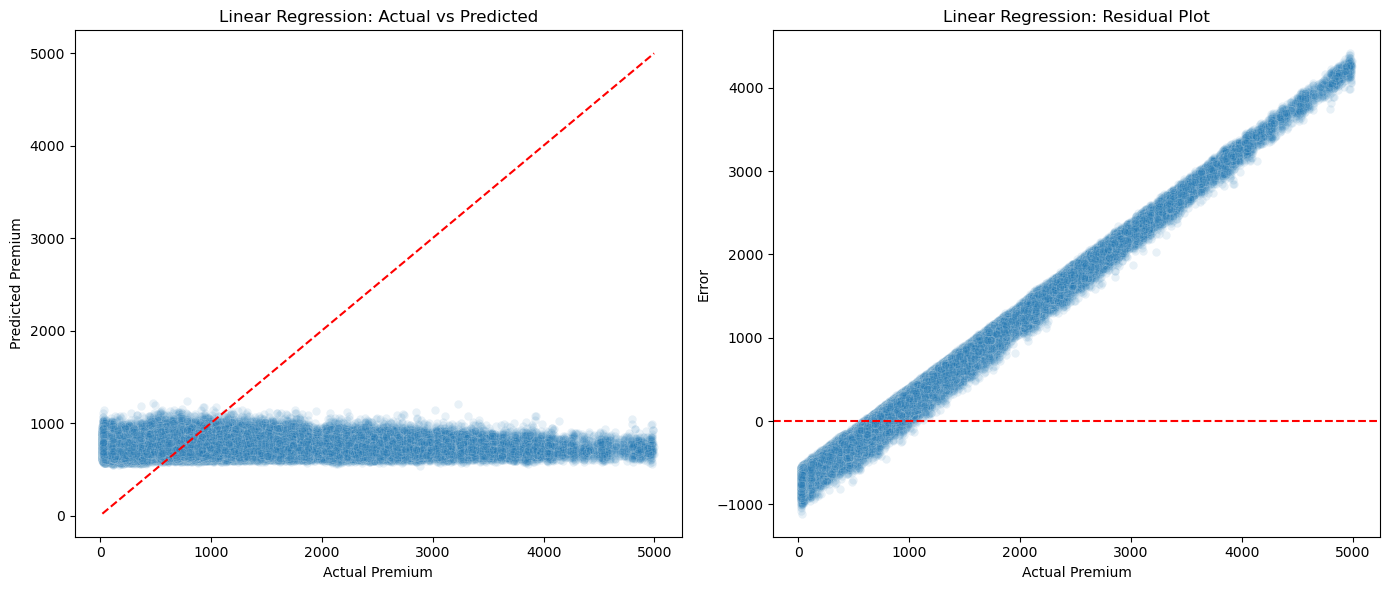

In [16]:
# 5. 결과 시각화 (잔차 패턴 확인)
plt.figure(figsize=(14, 6))

# A. Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_val_real, y=y_pred_real, alpha=0.1)
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--', label='Perfect')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')

# B. Residual Plot
residuals = y_val_real - y_pred_real
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val_real, y=residuals, alpha=0.1)
plt.axhline(0, color='r', linestyle='--')
plt.title('Linear Regression: Residual Plot')
plt.xlabel('Actual Premium')
plt.ylabel('Error')

plt.tight_layout()
plt.show()